In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle

In [2]:
L0,m,k=1,1,40
g=9.81
dt=0.01
tmax=20
t=np.arange(0,tmax+dt,dt)

In [3]:
def diff(y,t,L0,k,m):
    tta,a1,l,a2=y
    thetadot=a1
    ldot=a2
    a1dot=-(g*np.sin(tta)+2*a1*a2)/l
    a2dot=(m*l*a1**2-k*(l-L0)+m*g*np.cos(tta))/m
    
    return thetadot,a1dot,ldot,a2dot
    

In [4]:
y0=[.75*np.pi,0,L0,0]

y=odeint(diff,y0,t,args=(L0,k,m))

In [5]:
tta,ttd,lgt,lgtd=y[:,0],y[:,1],y[:,2],y[:,3]
x=lgt*np.sin(tta)
y=-lgt*np.cos(tta)

In [6]:
tsec=1
mtra=int(tsec/dt)
r=0.05

In [7]:
def plt_spring(x,y,l,tta):
    #project a helix to draw a spring
    hx_r=0.05
    hx_turns=30
    padd=100
    hp=np.linspace(0,l,1000)
    #setup a horizontal helix
    hel=np.zeros(1000)
    hel[padd:-padd]=hx_r*np.sin(2*np.pi*hx_turns*hp[padd:-padd]/l)
    rot=np.array([[np.cos(tta),-np.sin(tta)],[np.sin(tta),np.cos(tta)]])
    xs,ys= - rot @ np.vstack((hel,hp))
    ax.plot(xs,ys,c='k',lw=2)

In [8]:
def make_plot(i):
    plt_spring(x[i],y[i],lgt[i],tta[i])
    c0=Circle((0,0),r/2,fc='k',zorder=10)
    c1=Circle((x[i],y[i]),r,fc='k',ec='r',zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    n=20
    s= mtra//n
    for j in range(n):
        mini=i-(n-j)*s
        if mini<0:
            continue
        maxi=mini+s+1
        aa=(j/n)**2
        ax.plot(x[mini:maxi],y[mini:maxi],c='r',lw=2,alpha=aa)
    ax.set_xlim(-np.max(lgt)-r, np.max(lgt)+r)
    ax.set_ylim(-np.max(lgt)-r, np.max(lgt
                                      )+r)
    
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')    
    plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()

0 / 200
1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200


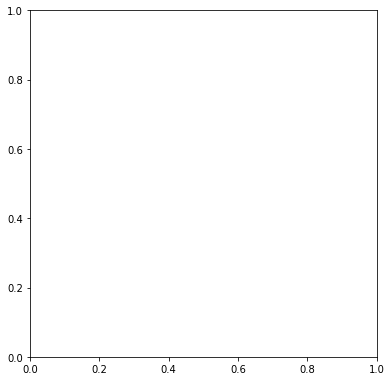

In [9]:
fps = 10
di = int(1/fps/dt)

fig = plt.figure(figsize=(8.33333333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)